In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
df_gen = pd.read_csv("generation.csv", sep=";",decimal=",")
df_temp = pd.read_csv("temperature.csv",sep=";",decimal=",")
df_gen

,DateTime,Generation
0,01Jan2019 0:00:00,0.000000
1,01Jan2019 1:00:00,0.000000
2,01Jan2019 2:00:00,0.000008
3,01Jan2019 3:00:00,0.000000
4,01Jan2019 4:00:00,0.000008
...,...,...
25555,30Nov2021 19:00:00,0.000000
25556,30Nov2021 20:00:00,0.000000
25557,30Nov2021 21:00:00,0.000000
25558,30Nov2021 22:00:00,0.000000


In [3]:
df_train = pd.concat([df_gen.iloc[:25560], df_temp.iloc[:25560].drop("DateTime", axis=1)], axis=1)
df_train

,DateTime,Generation,AirTemperature,ComfortTemperature,RelativeHumidity,WindSpeed,WindDirection,WWCode,EffectiveCloudCover
0,01Jan2019 0:00:00,0.000000,-1.7,-6.1,75.3,3.6,60,10.0,6.3
1,01Jan2019 1:00:00,0.000000,-1.8,-5.3,75.3,2.6,70,10.0,4.5
2,01Jan2019 2:00:00,0.000008,-2.0,-6.0,74.7,3.1,80,10.0,5.5
3,01Jan2019 3:00:00,0.000000,-1.9,-5.9,76.4,3.1,60,10.0,7.6
4,01Jan2019 4:00:00,0.000008,-2.0,-7.1,76.4,4.6,60,10.0,6.5
...,...,...,...,...,...,...,...,...,...
25555,30Nov2021 19:00:00,0.000000,7.1,5.2,76.8,3.1,220,25.0,6.0
25556,30Nov2021 20:00:00,0.000000,7.1,5.7,75.2,2.1,250,80.0,6.0
25557,30Nov2021 21:00:00,0.000000,5.8,3.1,83.4,4.1,280,80.0,7.0
25558,30Nov2021 22:00:00,0.000000,5.0,3.3,81.0,2.1,240,60.0,6.0


In [4]:
df_train["DateTime"]

0         01Jan2019 0:00:00
1         01Jan2019 1:00:00
2         01Jan2019 2:00:00
3         01Jan2019 3:00:00
4         01Jan2019 4:00:00
                ...        
25555    30Nov2021 19:00:00
25556    30Nov2021 20:00:00
25557    30Nov2021 21:00:00
25558    30Nov2021 22:00:00
25559    30Nov2021 23:00:00
Name: DateTime, Length: 25560, dtype: object

In [5]:
df_train["DateTime"] = pd.to_datetime(df_train["DateTime"])

In [6]:
df_train["DateTime"]

0       2019-01-01 00:00:00
1       2019-01-01 01:00:00
2       2019-01-01 02:00:00
3       2019-01-01 03:00:00
4       2019-01-01 04:00:00
                ...        
25555   2021-11-30 19:00:00
25556   2021-11-30 20:00:00
25557   2021-11-30 21:00:00
25558   2021-11-30 22:00:00
25559   2021-11-30 23:00:00
Name: DateTime, Length: 25560, dtype: datetime64[ns]

In [7]:
df_train = df_train.set_index('DateTime')
df_train.head()

,Generation,AirTemperature,ComfortTemperature,RelativeHumidity,WindSpeed,WindDirection,WWCode,EffectiveCloudCover
DateTime,,,,,,,,
2019-01-01 00:00:00,0.000000,-1.7,-6.1,75.3,3.6,60,10.0,6.3
2019-01-01 01:00:00,0.000000,-1.8,-5.3,75.3,2.6,70,10.0,4.5
2019-01-01 02:00:00,0.000008,-2.0,-6.0,74.7,3.1,80,10.0,5.5
2019-01-01 03:00:00,0.000000,-1.9,-5.9,76.4,3.1,60,10.0,7.6
2019-01-01 04:00:00,0.000008,-2.0,-7.1,76.4,4.6,60,10.0,6.5


In [14]:
df_test = df_temp.iloc[25560:26304]
df_test["DateTime"] = pd.to_datetime(df_test["DateTime"])
df_test =df_test.set_index("DateTime")
df_test.head()

C:\Users\hasan\AppData\Local\Temp/ipykernel_5312/4147765628.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["DateTime"] = pd.to_datetime(df_test["DateTime"])


,AirTemperature,ComfortTemperature,RelativeHumidity,WindSpeed,WindDirection,WWCode,EffectiveCloudCover
DateTime,,,,,,,
2021-12-01 00:00:00,4.9,4.7,86.9,1.0,210,60.0,7.3
2021-12-01 01:00:00,4.9,4.7,86.9,0.5,210,61.0,6.0
2021-12-01 02:00:00,4.5,4.3,84.4,1.0,210,61.0,6.0
2021-12-01 03:00:00,3.7,3.5,86.8,1.5,200,21.0,7.3
2021-12-01 04:00:00,3.7,3.5,86.8,1.0,210,68.0,6.5


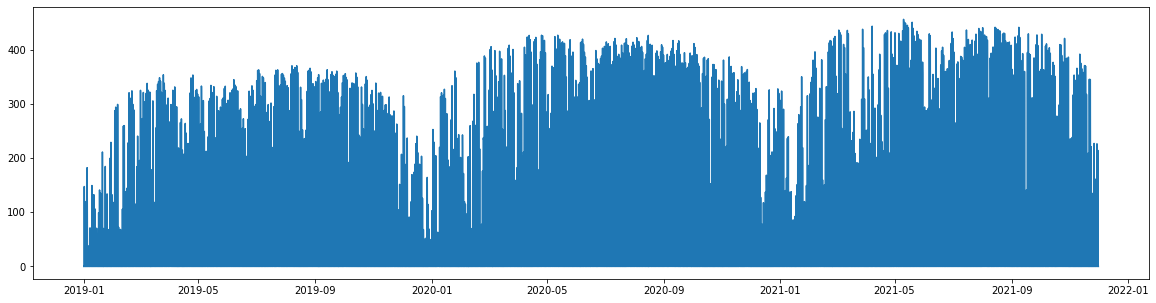

In [30]:
plt.figure(figsize=(20,5))
plt.plot(df_train['Generation'])
plt.show()

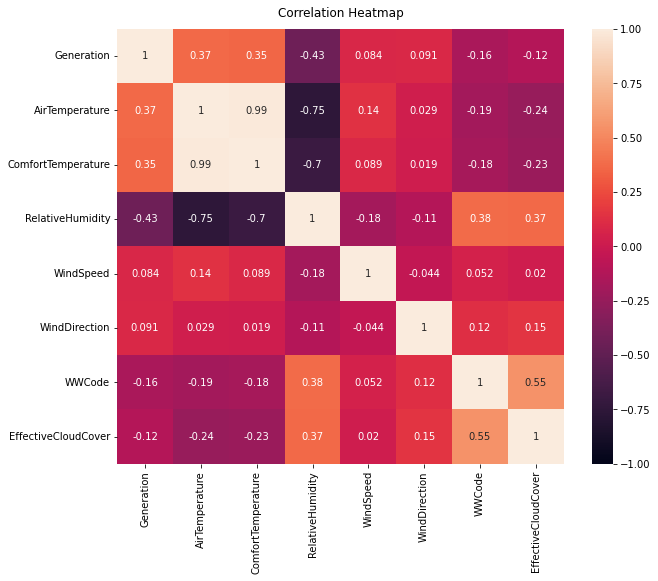

In [37]:
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(df_train.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [39]:
model = keras.Sequential()
model.add(layers.Input(shape=32,))
model.add(layers.LSTM())
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          64000     
                                                                 
 lstm (LSTM)                 (None, 128)               98816     
                                                                 
 dense (Dense)               (None, 10)                1290      
                                                                 
Total params: 164,106
Trainable params: 164,106
Non-trainable params: 0
_________________________________________________________________


In [40]:
inputs = tf.random.normal([32, 10, 8])
lstm = tf.keras.layers.LSTM(4)
output = lstm(inputs)
print(output.shape)

lstm = tf.keras.layers.LSTM(4, return_sequences=True, return_state=True)
whole_seq_output, final_memory_state, final_carry_state = lstm(inputs)
print(whole_seq_output.shape)

print(final_memory_state.shape)

print(final_carry_state.shape)


(32, 4)
(32, 10, 4)
(32, 4)
(32, 4)
